<IPython.core.display.Javascript object>


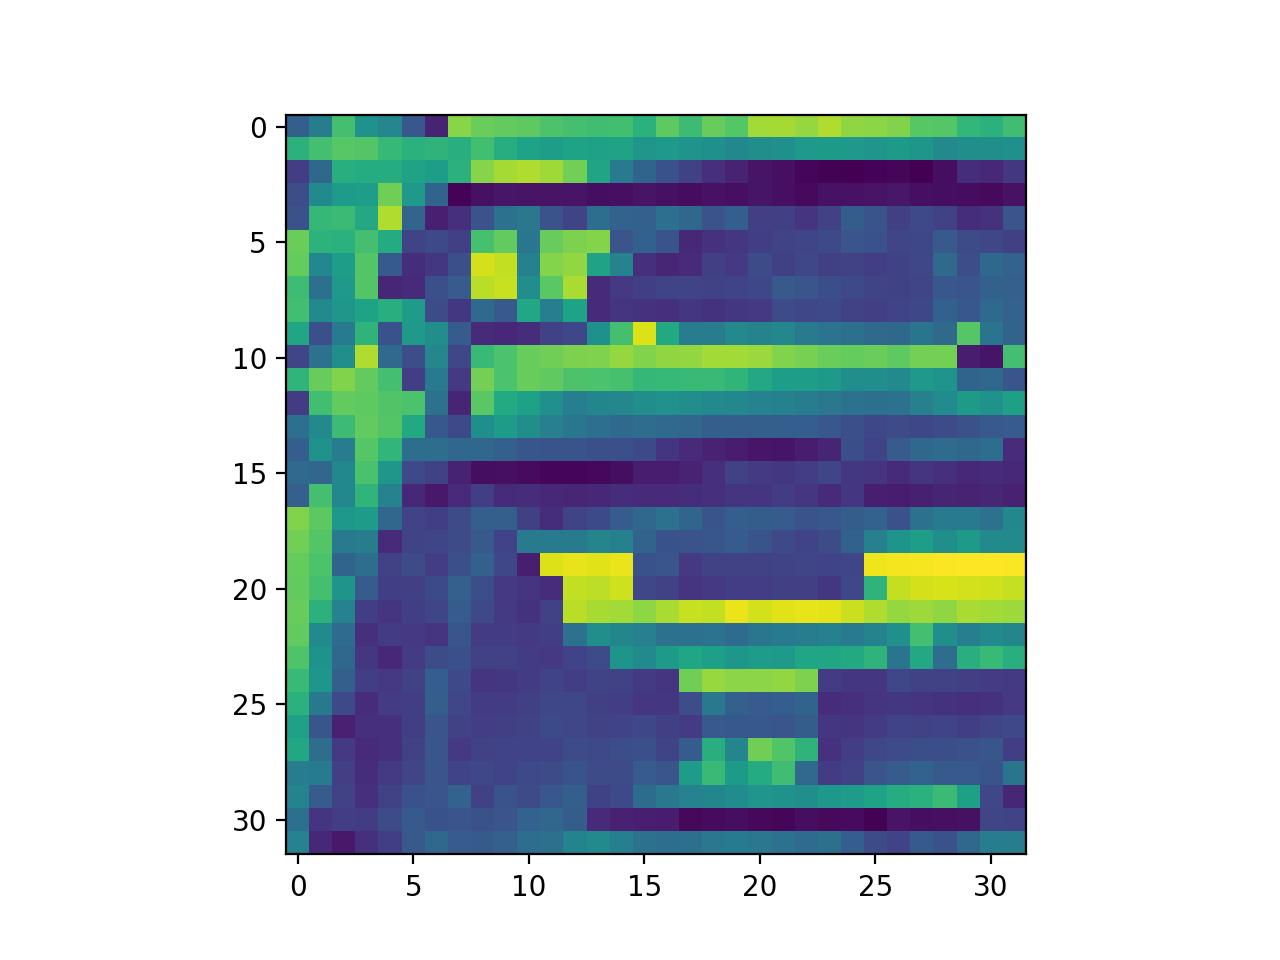

In [303]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

img = cv2.imread('sign5.jpg',0)
img1 = cv2.imread('sign5.jpg',cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(np.uint8(img), (3,3), 0)
sigma = 0.33
v = np.median(img)
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img,lower,upper)

plt.imshow(edges,cmap = 'gray')

In [294]:
im2, contours, hierarchy = cv2.findContours(np.uint8(edges),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

659

In [295]:
ar = []
conts = []
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    cA = w*h
    
#     if(cA>500):
#     conts.append([x,y,w,h,cA,i])
    
    if(h!=0 and w/h>=0.5 and w/h<=2):
        ar.append(cA)
    
len(ar)

452

In [296]:
mx = max(ar) 
perLen = 0.07

for i in range(len(contours)):
    
    x,y,w,h = cv2.boundingRect(contours[i])
    cA = w*h
    if(w>=img.shape[0]*perLen and h>=img.shape[1]*perLen and h!=0 and w/h>=0.5 and w/h<=2):
        conts.append([x,y,w,h,cA,i])
    
    
conts = sorted(conts, reverse = True, key = lambda value : (value[4]))
# conts[:10]
    
conts = np.array(conts)

In [297]:
len(conts)

29

In [298]:
shape = "unidentified"

for i in range(len(conts)):
    peri = cv2.arcLength(contours[conts[i,5]], True)
    approx = cv2.approxPolyDP(contours[conts[i,5]], 0.04 * peri, True)
    print(len(approx))
    
    

7
6
8
8
5
2
2
3
4
4
8
8
2
4
4
9
8
3
3
2
3
6
3
2
4
4
4
2
8


In [261]:
ind = 1
plt.imshow(edges[  conts[ind,1] : conts[ind,1] + conts[ind,3] , conts[ind,0] : conts[ind,0] + conts[ind,2]  ])

In [262]:
# load json and create model
from keras.models import model_from_json
json_file = open('trafficsign1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("trafficsign1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = loaded_model

Loaded model from disk


In [299]:
def pre(X):
  #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :,  0] + 0.587 * X[:, :,  1] + 0.114 * X[:, :,  2]
  
#   print(X)
#   X = cv2.cvtColor(X,cv2.COLOR_BGR2YCR_CB)
  
#   X = X[:][:][:][0]
  #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)

#   for i in range(X.shape[0]):
#       with warnings.catch_warnings():
#           warnings.simplefilter("ignore")
#           X[i] = exposure.equalize_adapthist(X[i])
#       print_progress(i + 1, X.shape[0])

 

  # Add a single grayscale channel
#   X = X.reshape(X.shape + (1,)) 
  
    return X

10


<IPython.core.display.Javascript object>


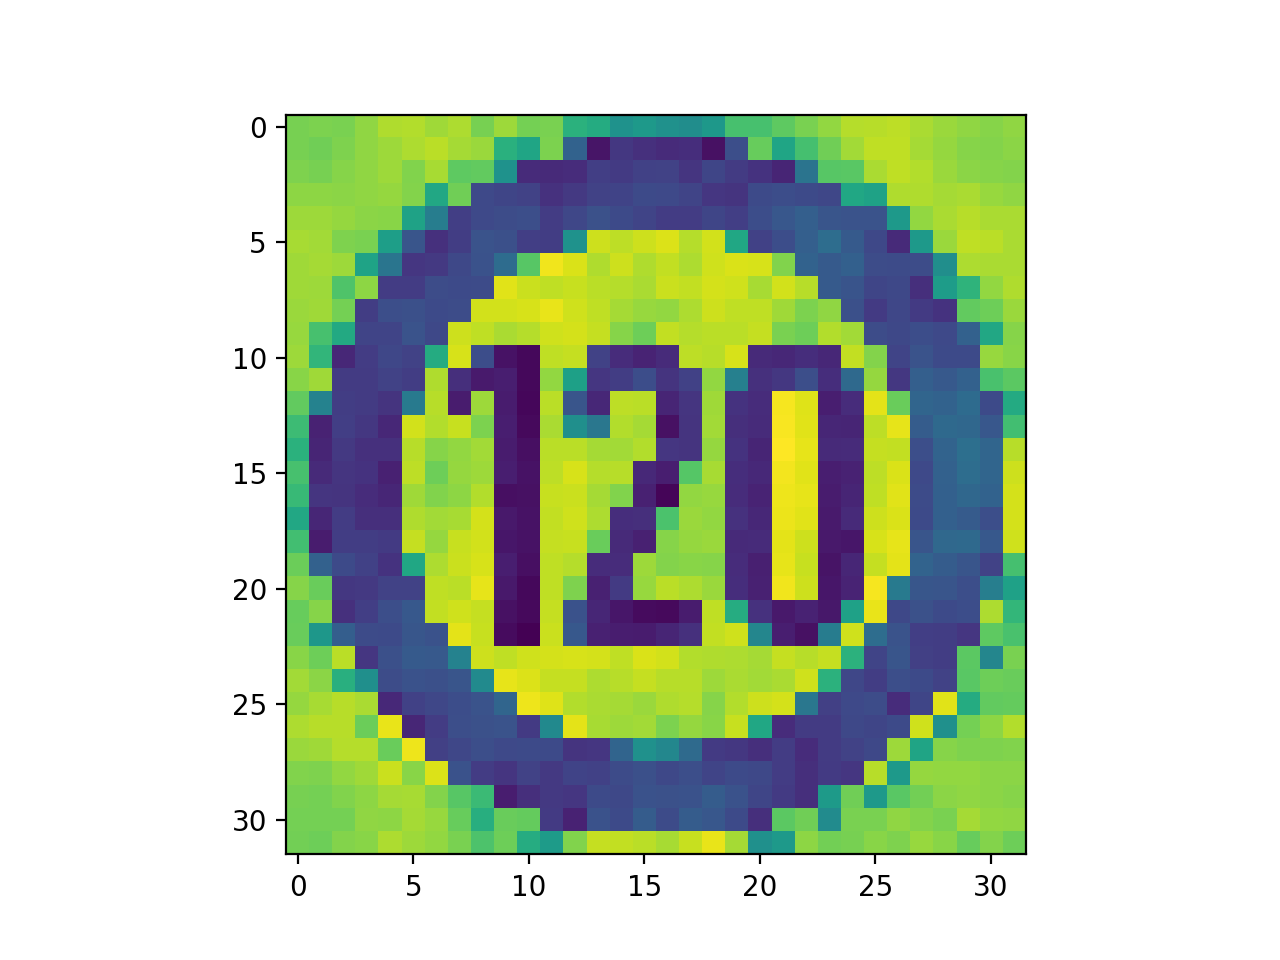

0


<IPython.core.display.Javascript object>


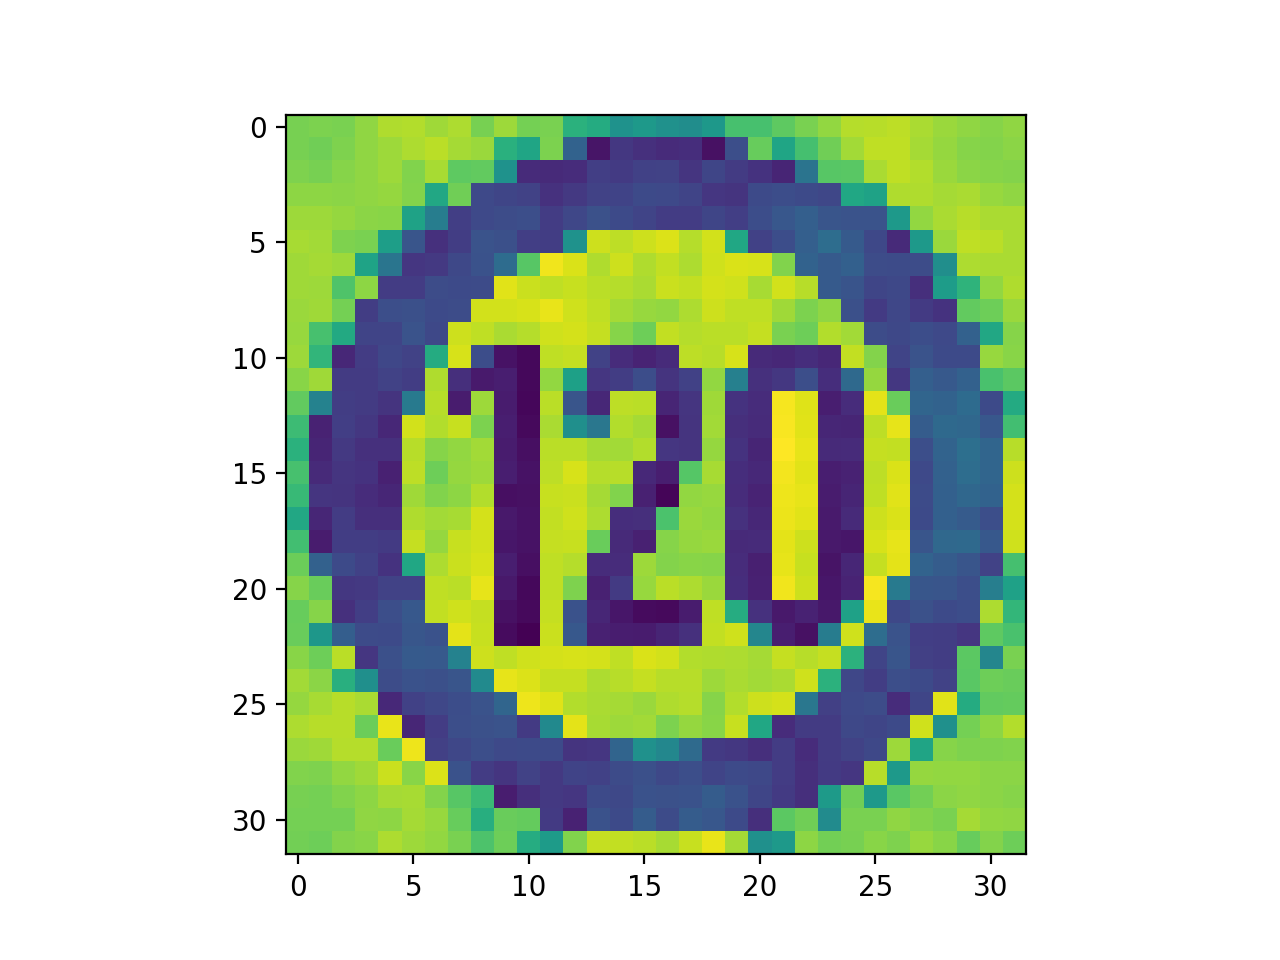

0


<IPython.core.display.Javascript object>


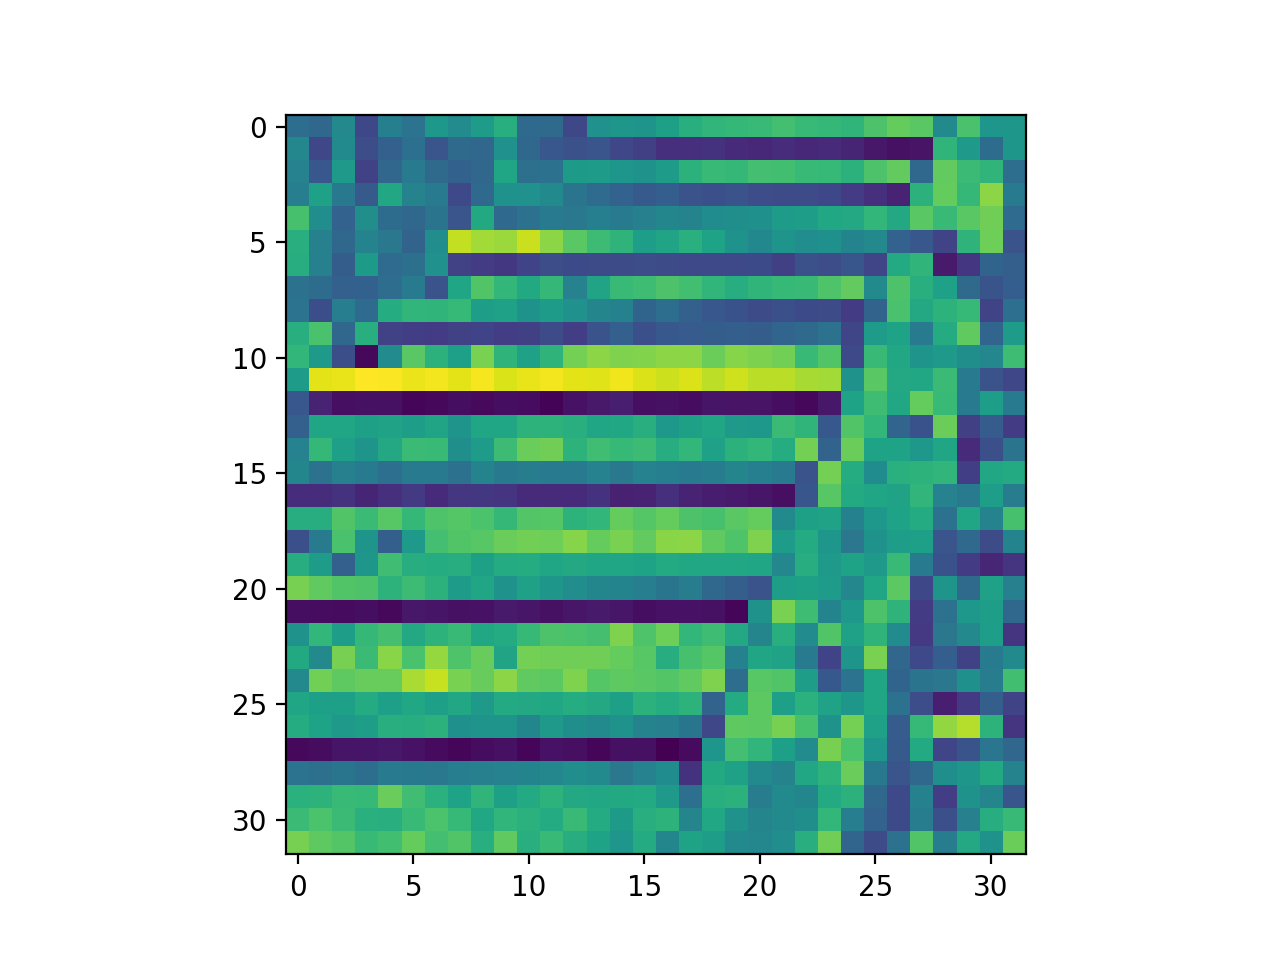

2


<IPython.core.display.Javascript object>


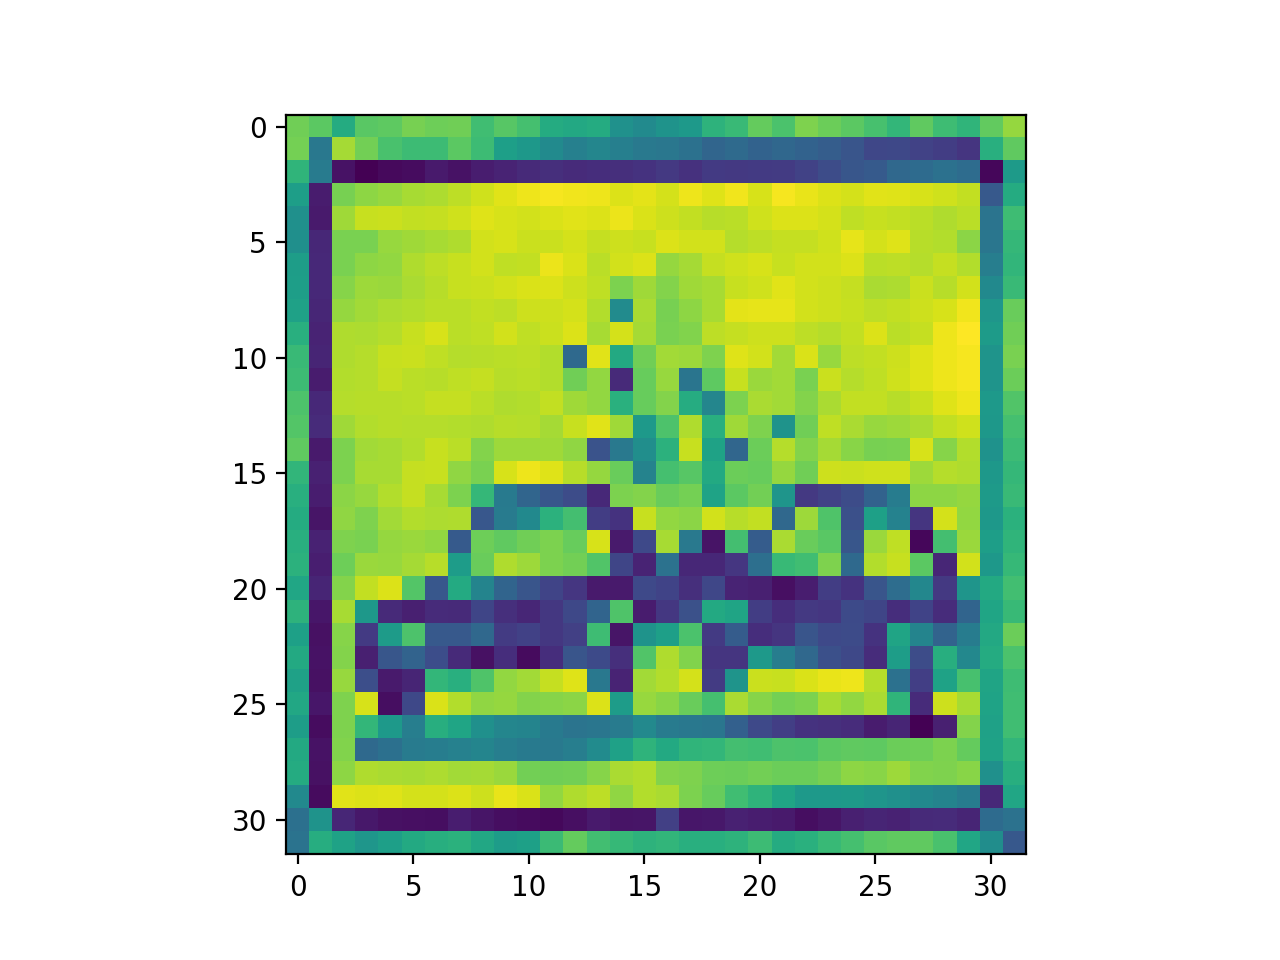

1


<IPython.core.display.Javascript object>


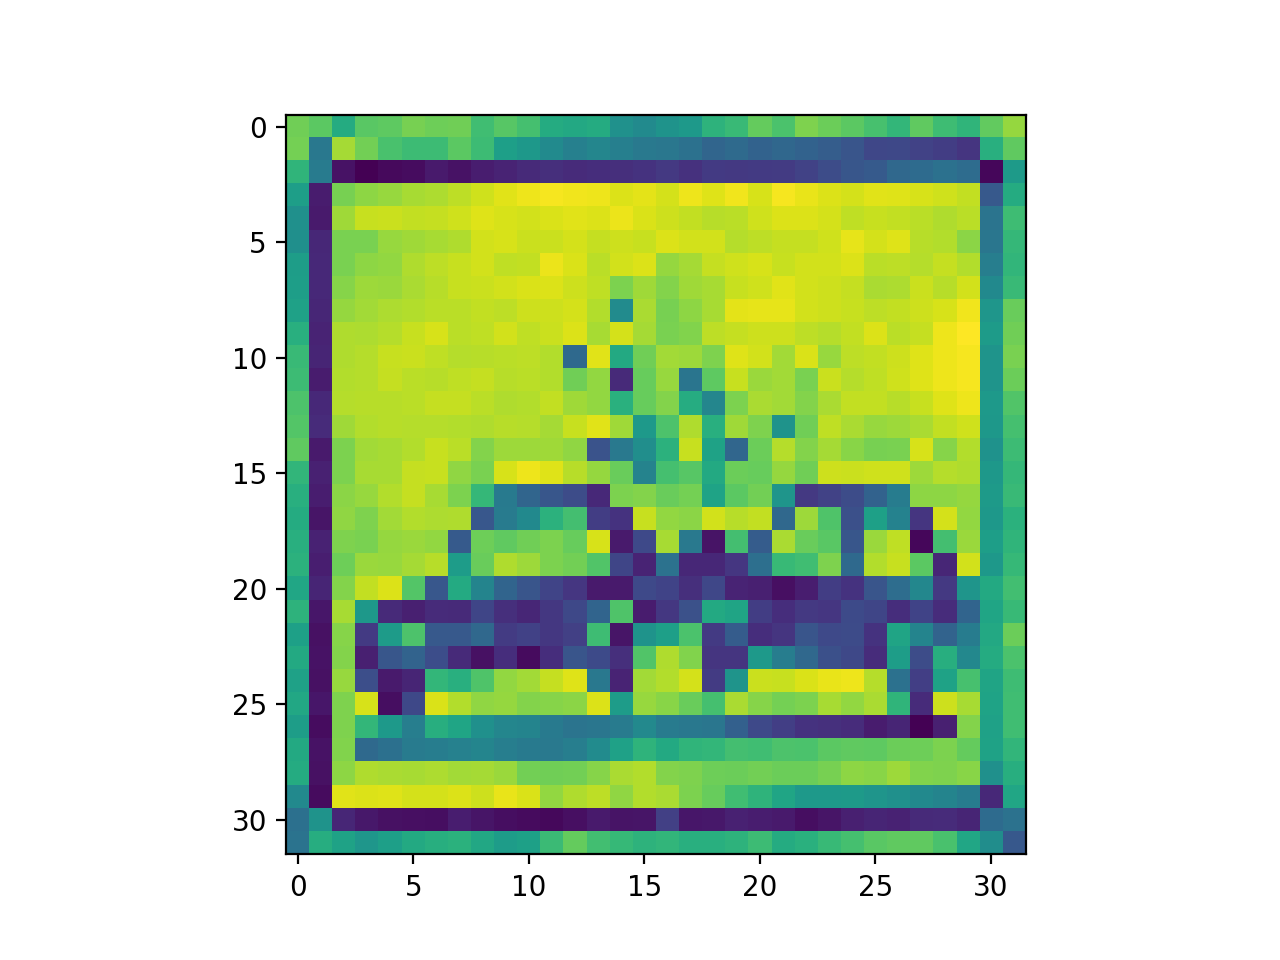

1


<IPython.core.display.Javascript object>


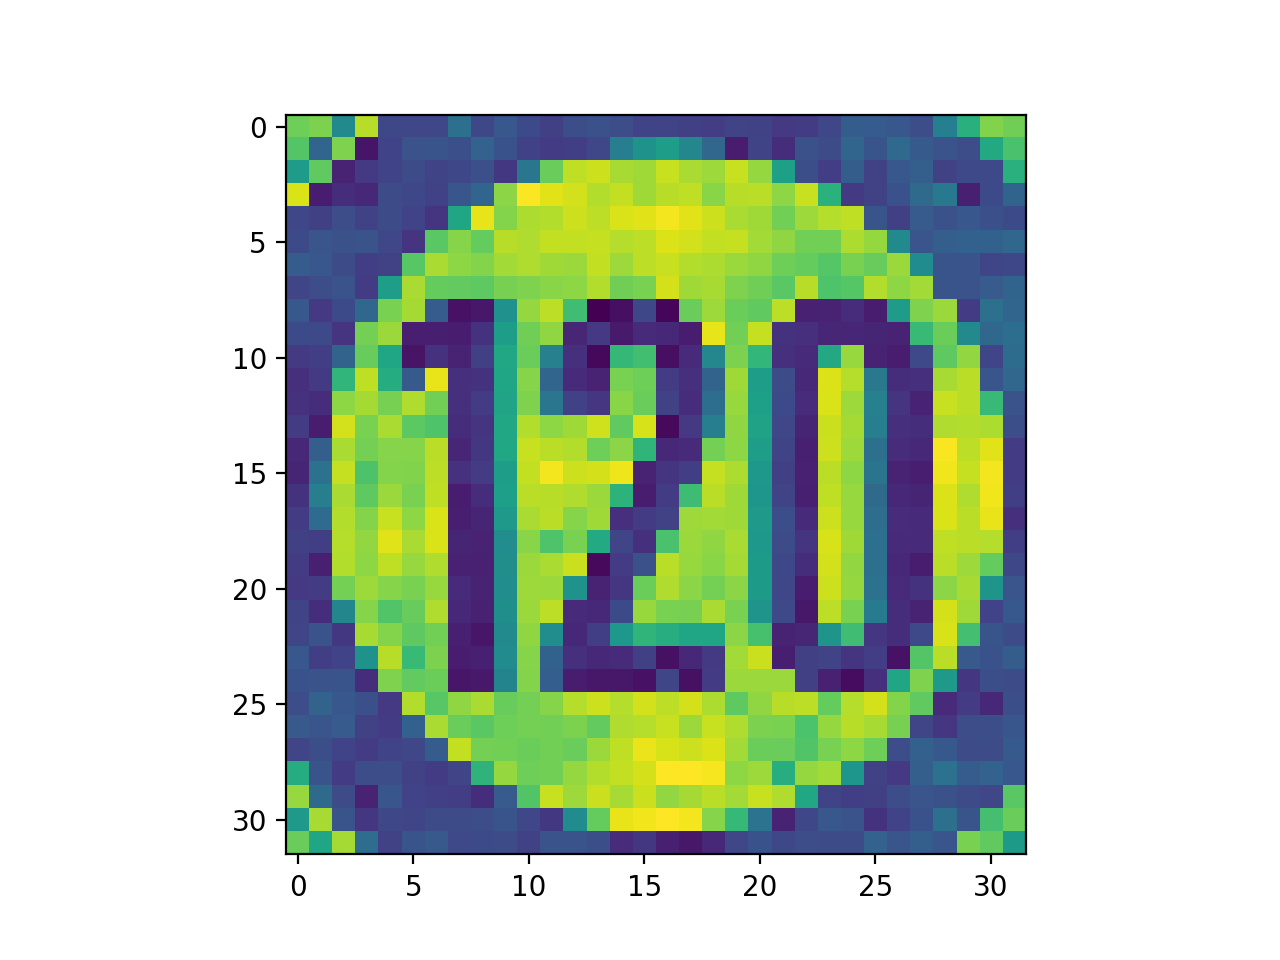

18


<IPython.core.display.Javascript object>


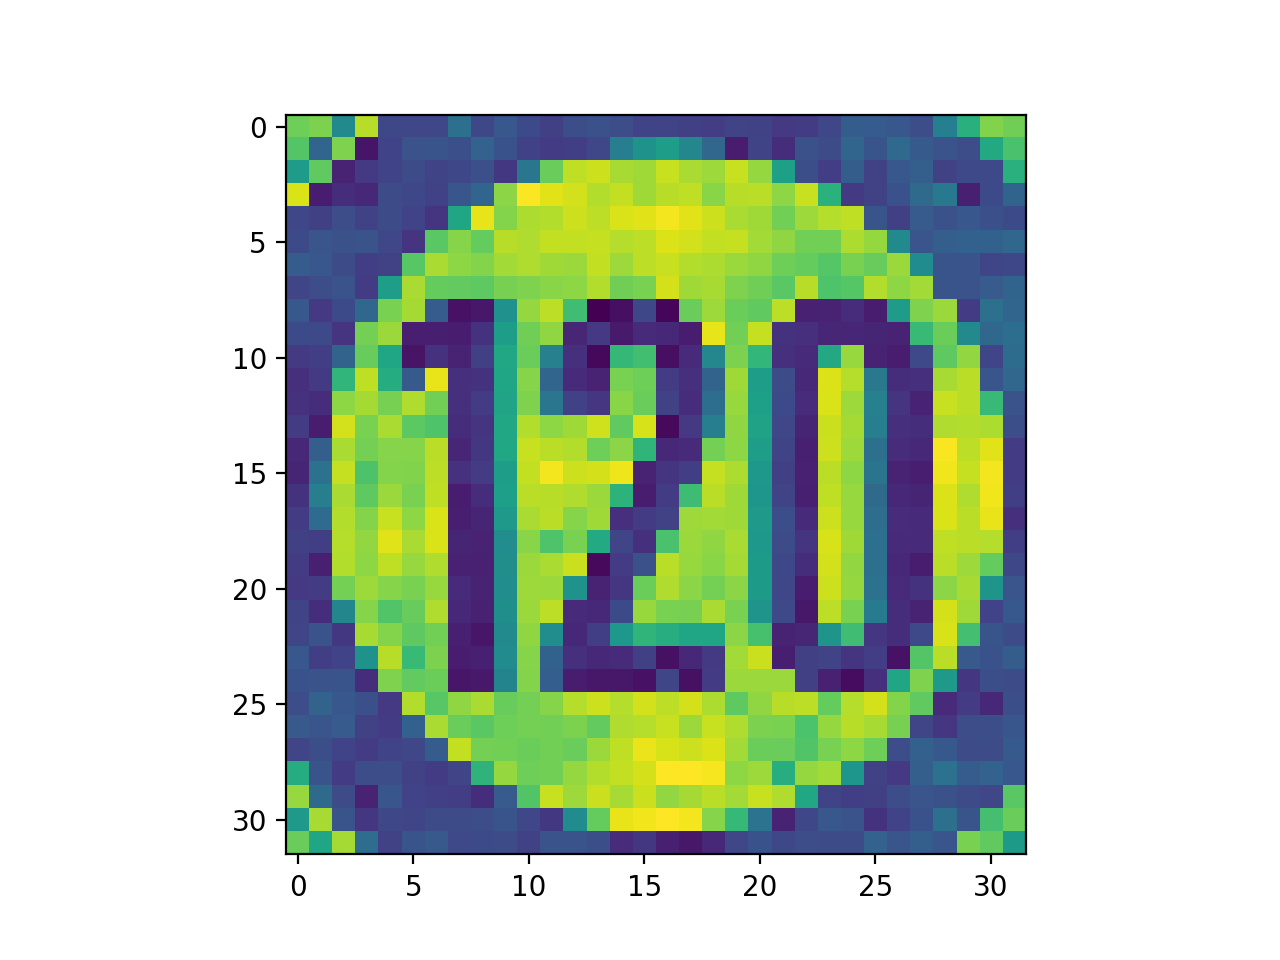

18


<IPython.core.display.Javascript object>


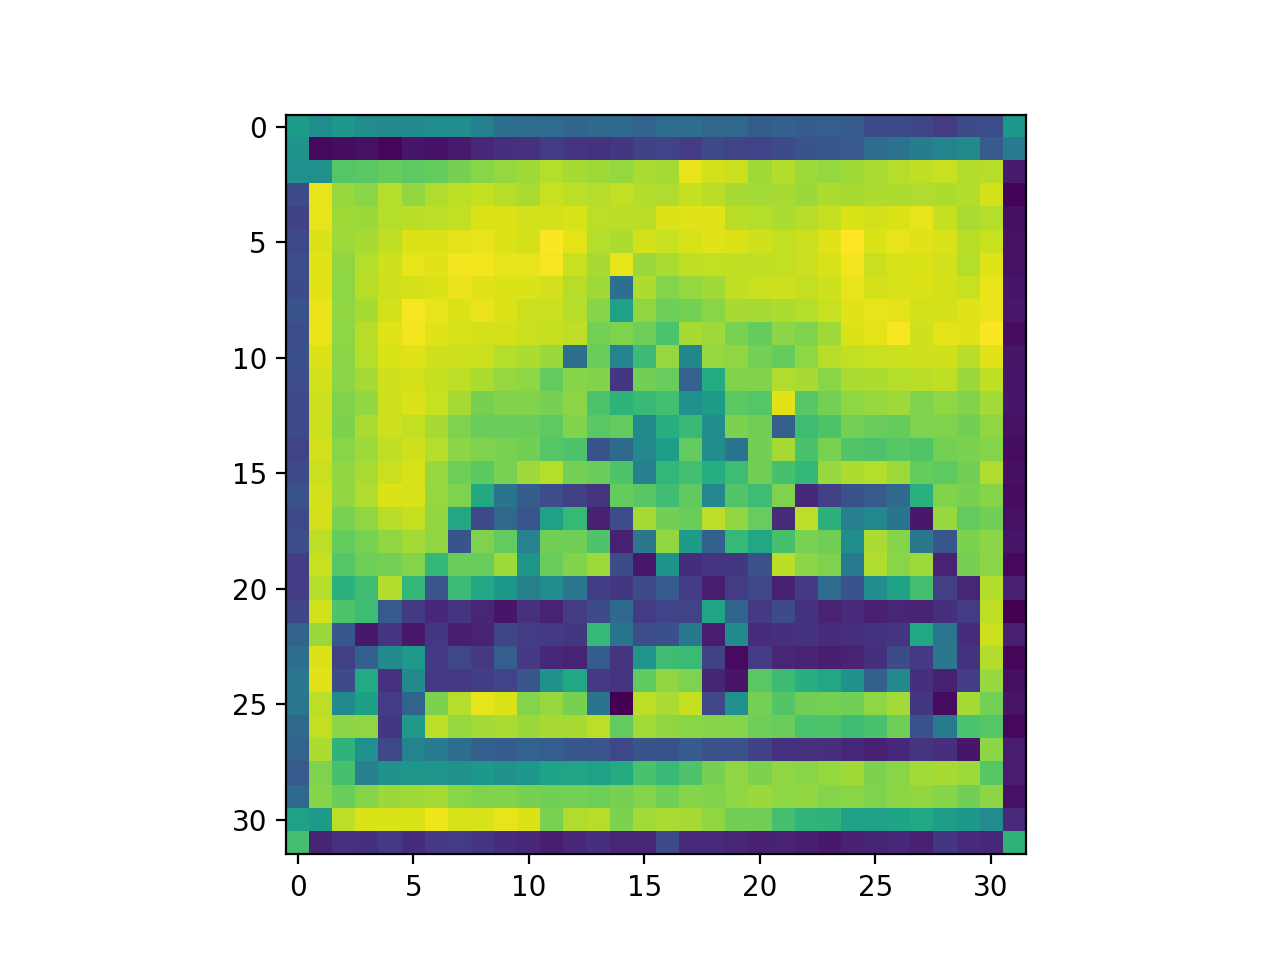

5


<IPython.core.display.Javascript object>


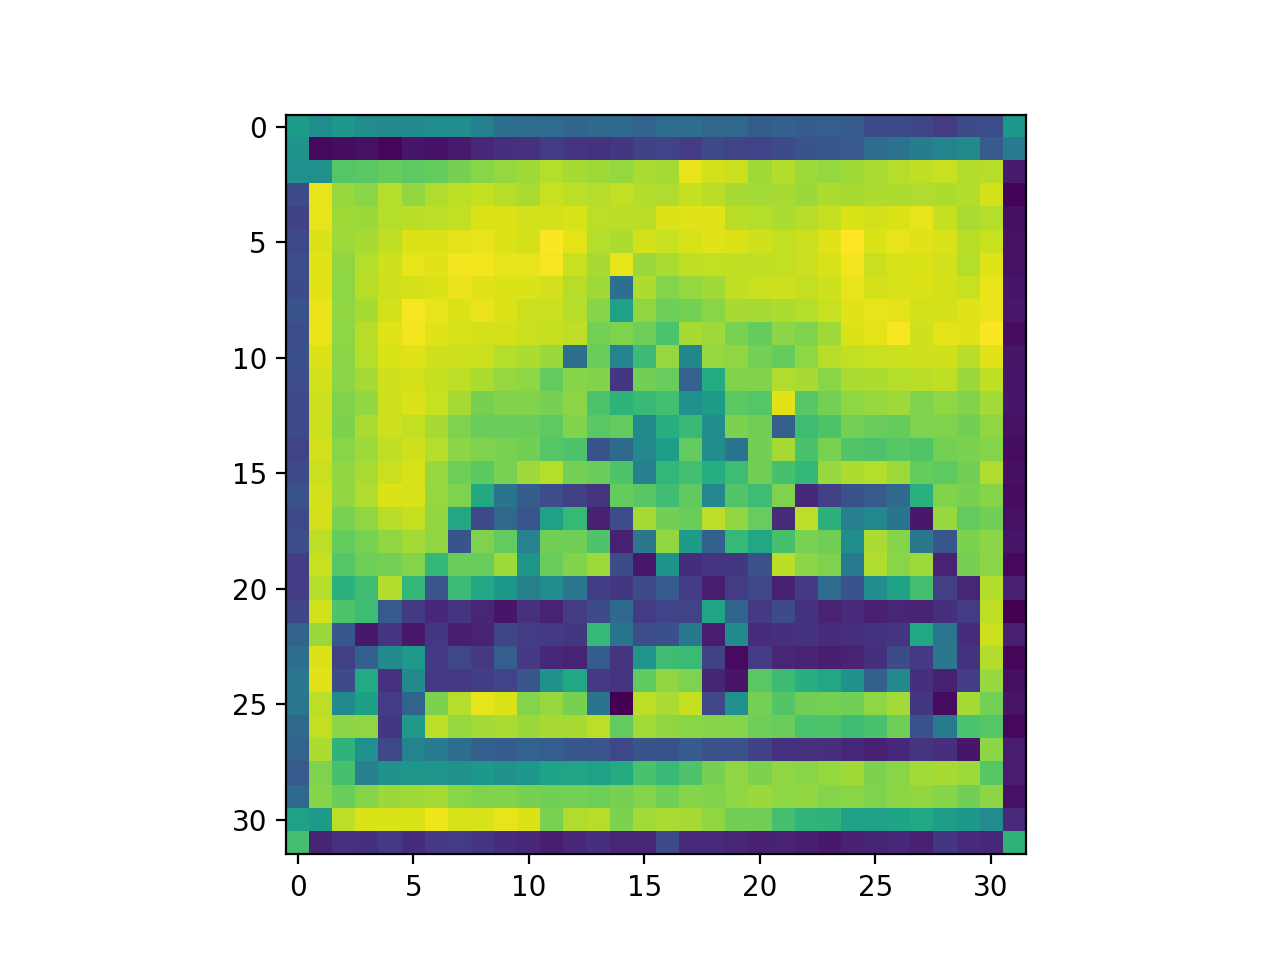

5


<IPython.core.display.Javascript object>


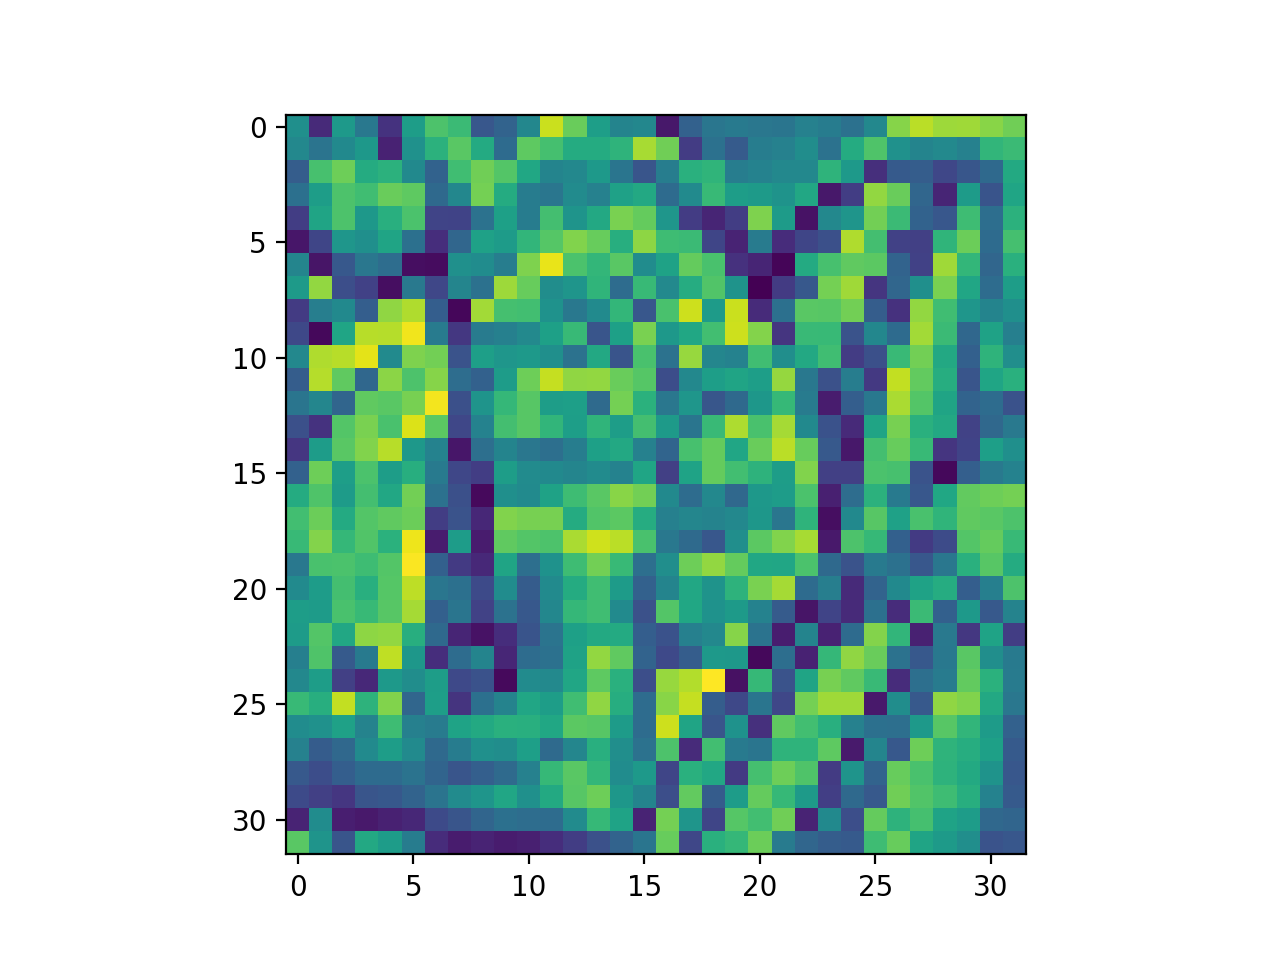

40


<IPython.core.display.Javascript object>


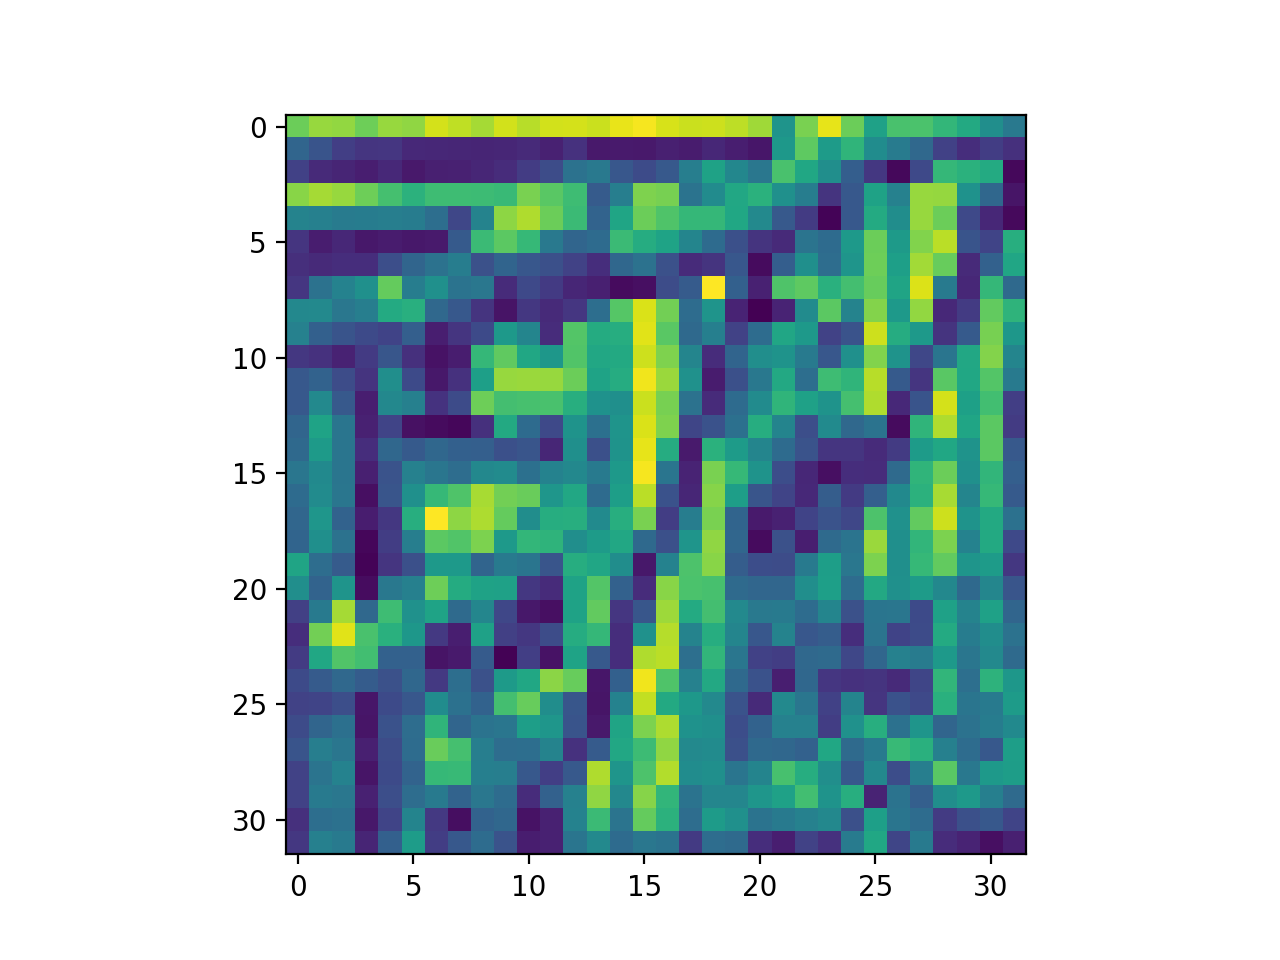

13


<IPython.core.display.Javascript object>


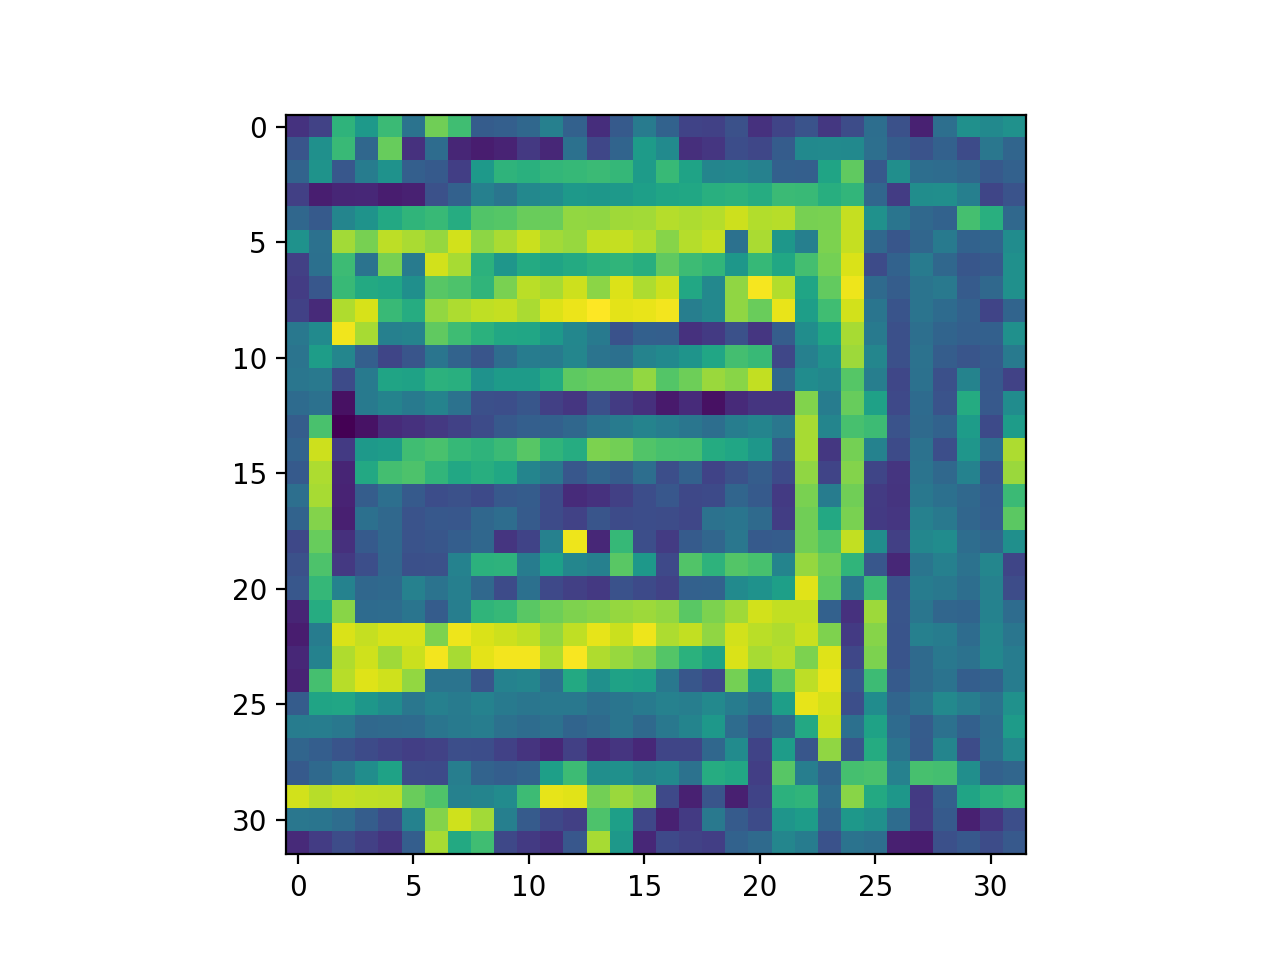

40


<IPython.core.display.Javascript object>


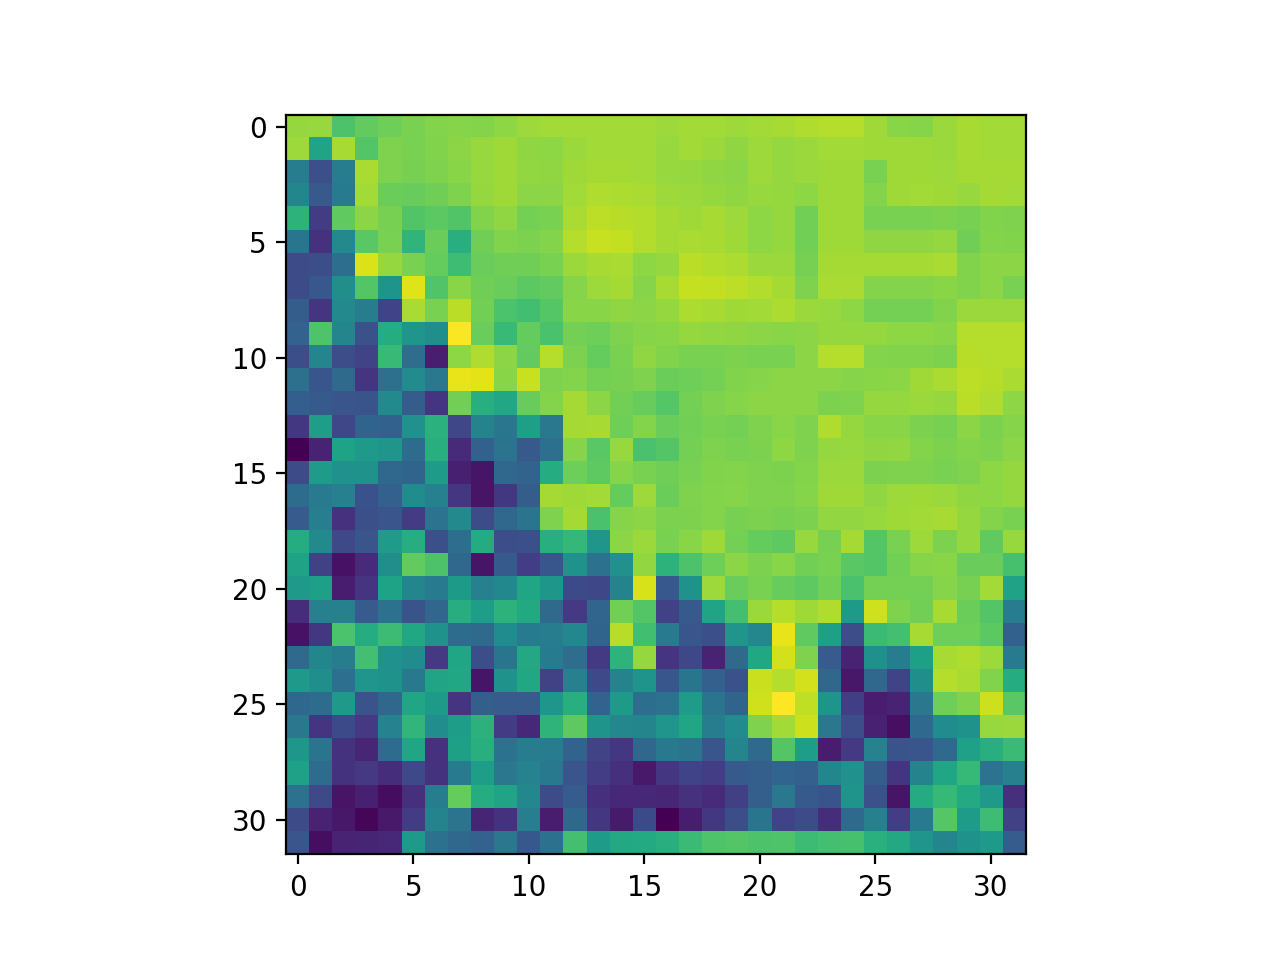

13


<IPython.core.display.Javascript object>


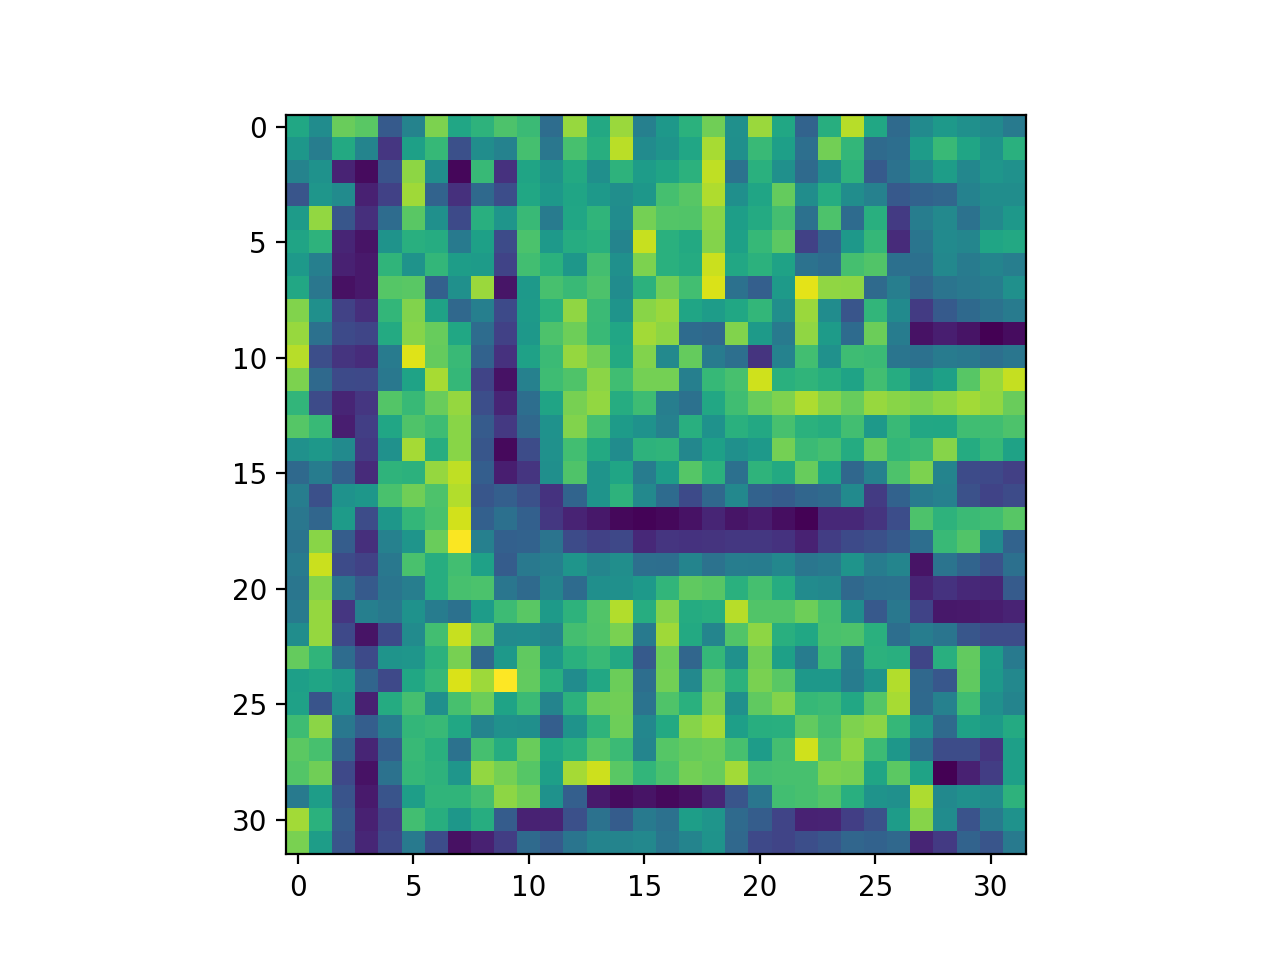

23


<IPython.core.display.Javascript object>


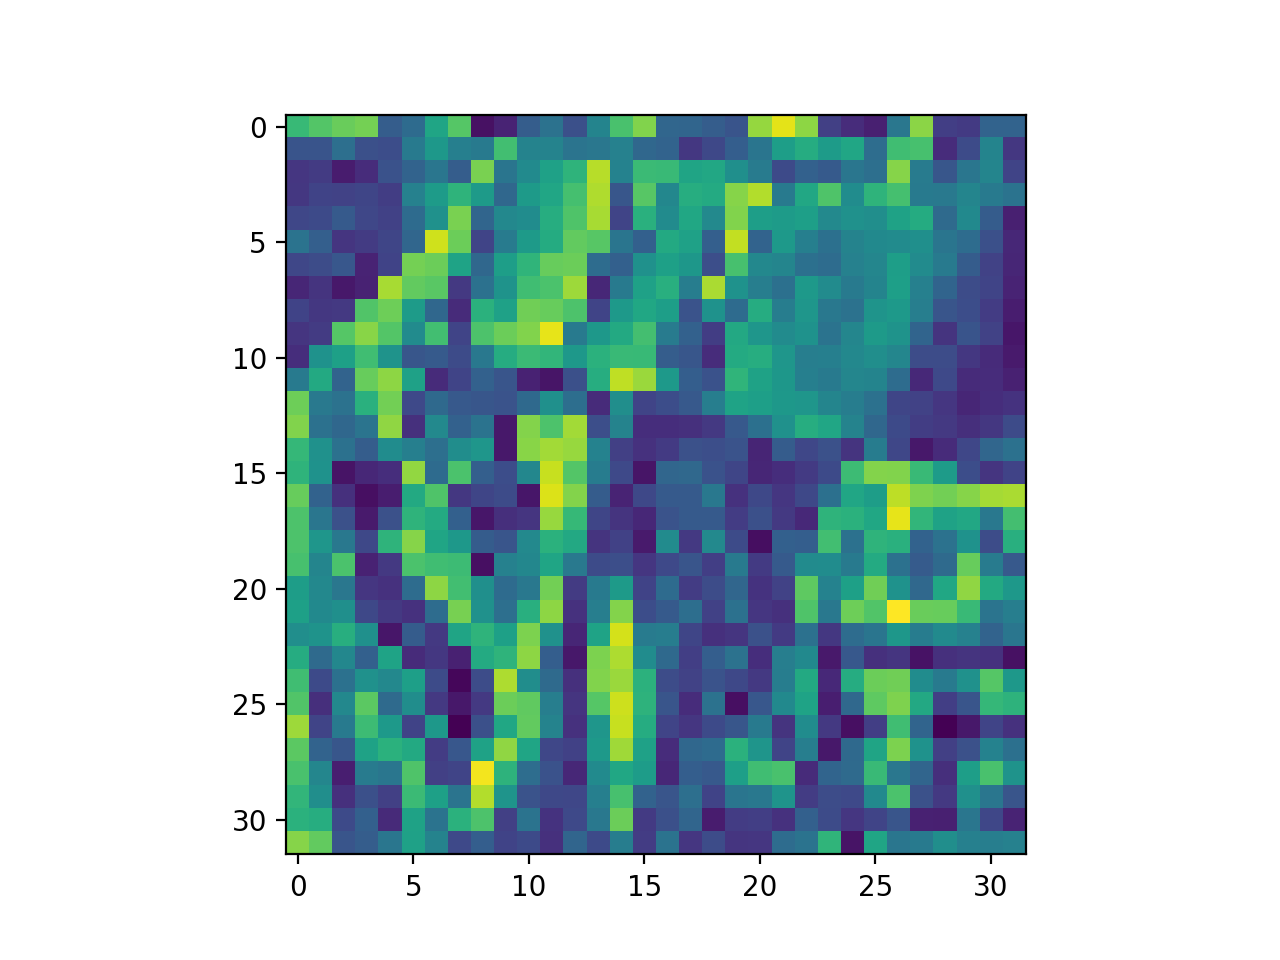

40


<IPython.core.display.Javascript object>


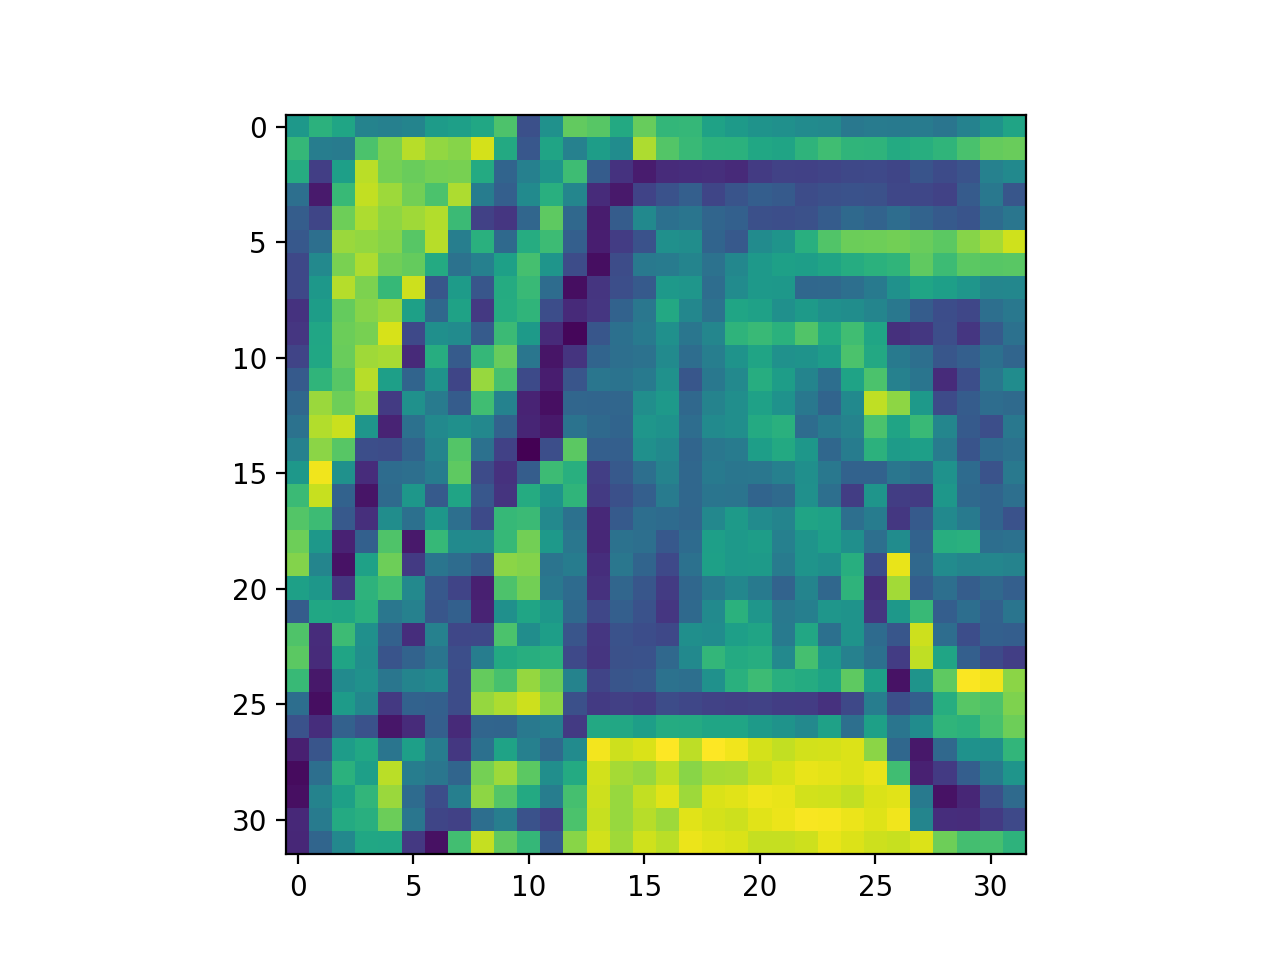

40


<IPython.core.display.Javascript object>


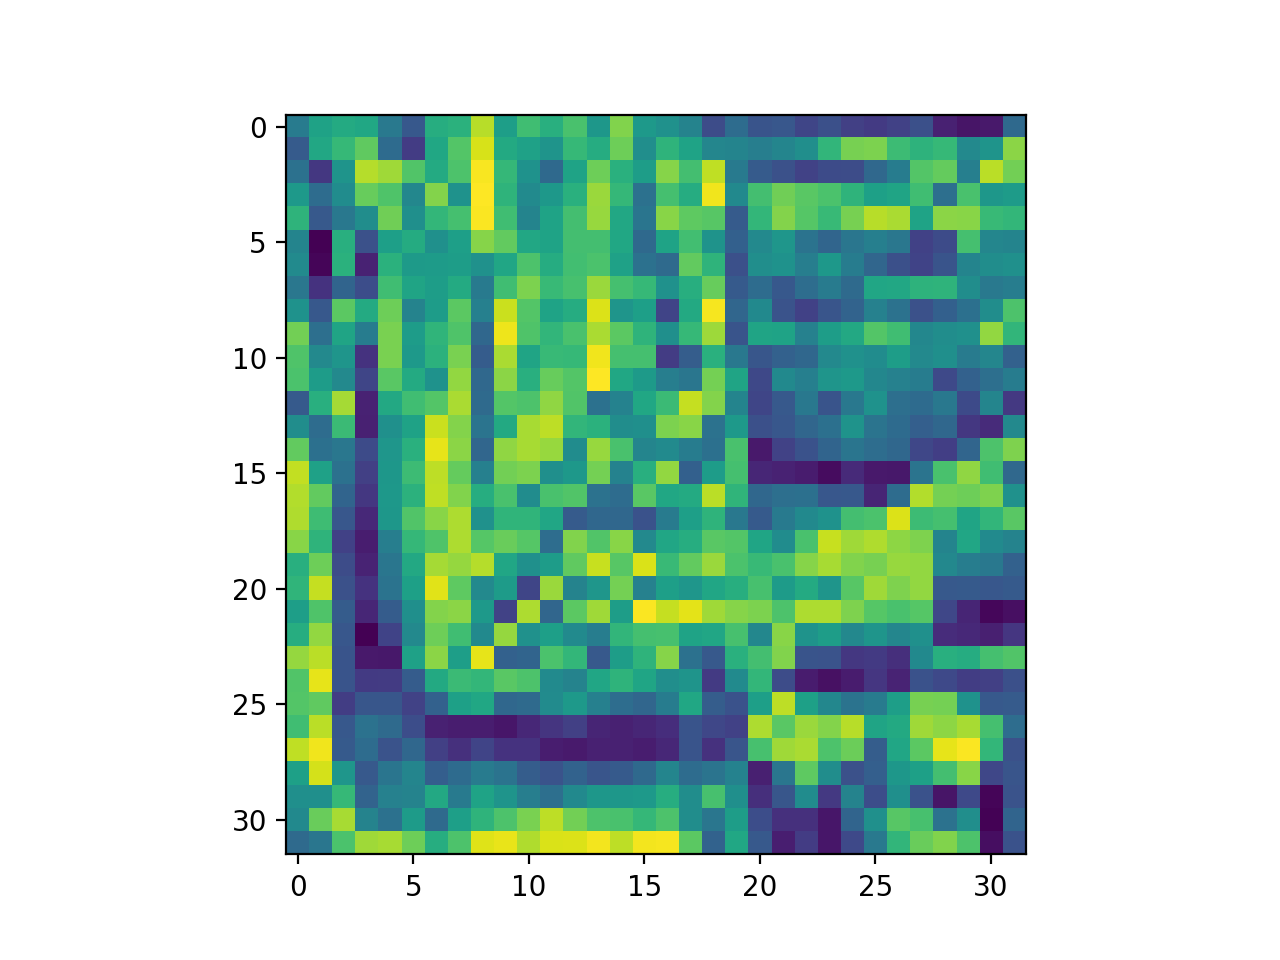

23


<IPython.core.display.Javascript object>


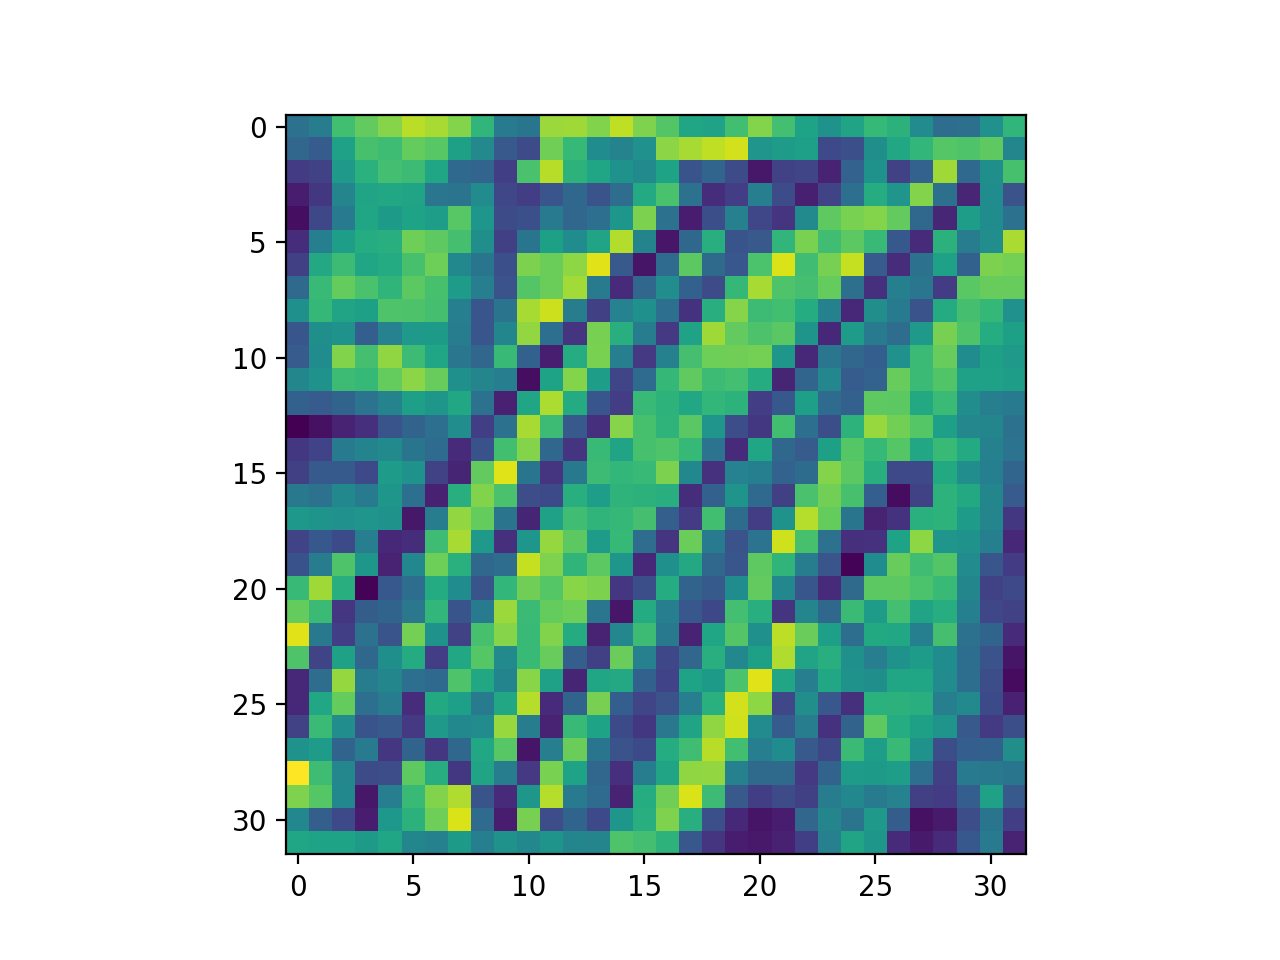

13


<IPython.core.display.Javascript object>


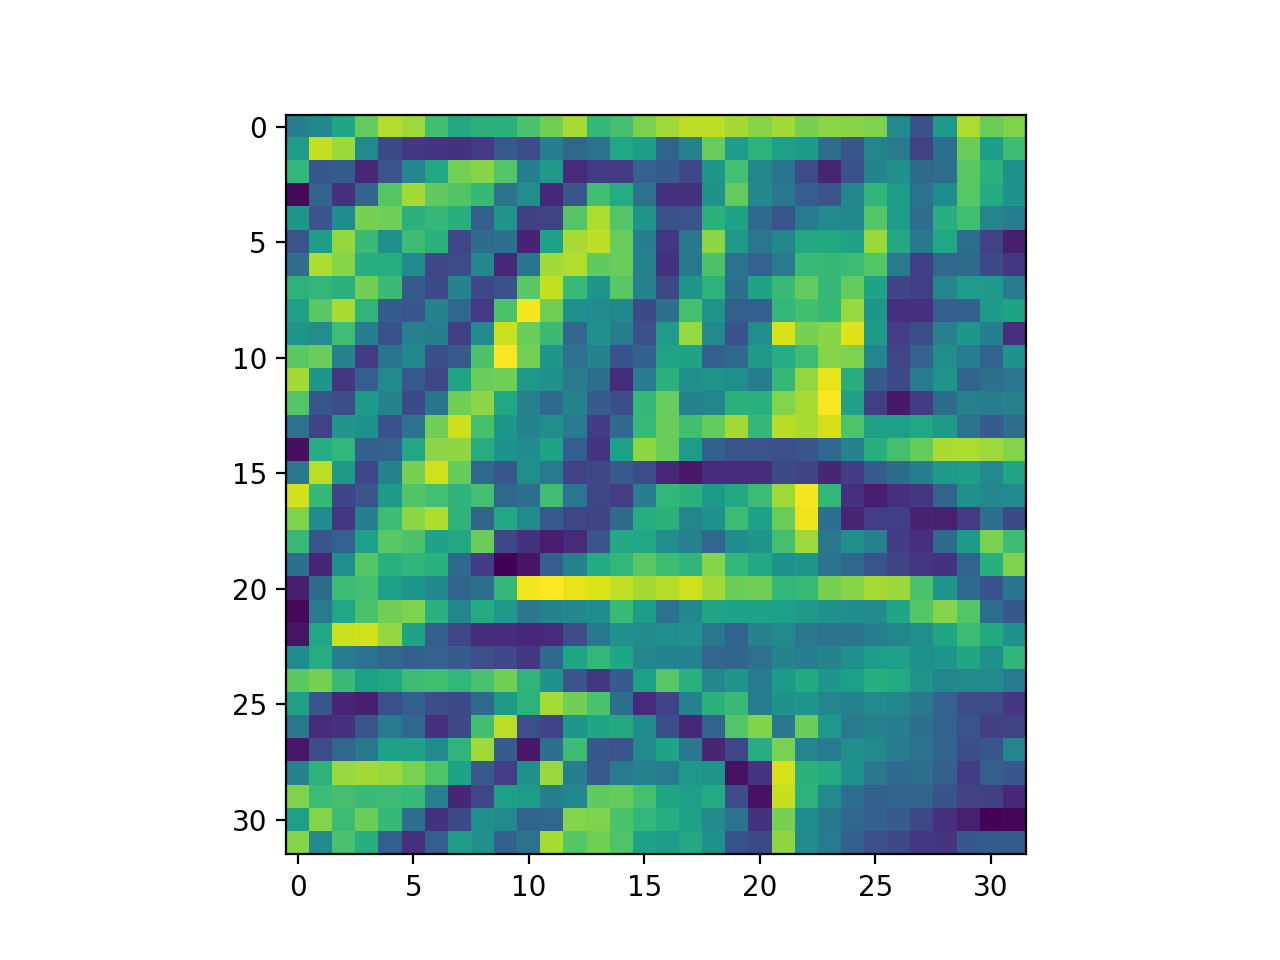

23


In [304]:
ans = []
par=0.03
for i in range(len(conts)):
    peri = cv2.arcLength(contours[conts[i,5]], True)
    approx = cv2.approxPolyDP(contours[conts[i,5]], 0.04 * peri, True)
    if(len(approx)==4 or len(approx)==6 or len(approx)==3 or len(approx)==8):
        
        check = img1.copy()
        check = check[int(conts[i,1] - conts[i,3]*par)  : int(conts[i,1] + conts[i,3] + conts[i,3]*par) , int(conts[i,0] - conts[i,2]*par) : int(conts[i,0] + conts[i,2] + conts[i,2]*par)]
        
        
        
        
        labs = cv2.cvtColor(check, cv2.COLOR_RGB2LAB)

        lab_planes = cv2.split(labs)

        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(10,10))

        lab_planes[0] = clahe.apply(lab_planes[0])

        labs = cv2.merge(lab_planes)

        check = cv2.cvtColor(labs, cv2.COLOR_LAB2RGB)
        
        
 

        
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        
#         print(img.shape)
        
        check = pre(check)
        
        
        check = cv2.resize(check, (32, 32))
        
        plt.figure(i)
        plt.imshow(check)
        
        
        check = np.array(check).reshape(-1, 32, 32, 1)
        
        
        print(np.argmax(model.predict(check)))
        ans.append(model.predict(check))
    
    

In [271]:
r = np.unique(ans, return_counts= True)

In [272]:
r[0][np.argmax(r[1])]

14

In [305]:
ans2=[]
for i in range(len(ans)):
    ans3 = list(ans[i])
    
    ans2.append((np.argmax(ans3[0]),ans3[0][np.argmax(ans[i])]))

In [306]:
ans2

[(10, 0.39216965),
 (0, 0.98698723),
 (0, 0.98698723),
 (2, 0.99225384),
 (1, 0.25152907),
 (1, 0.25152907),
 (18, 0.8169787),
 (18, 0.8169787),
 (5, 0.5284696),
 (5, 0.5284696),
 (40, 0.33854976),
 (13, 0.7128667),
 (40, 0.5508316),
 (13, 0.9928469),
 (23, 0.4161008),
 (40, 0.96453476),
 (40, 0.20161155),
 (23, 0.9709508),
 (13, 0.2842008),
 (23, 0.50465477)]